In [1]:
print("hello, langgraph!!")

hello, langgraph!!


##### 1. First, define the state of the graph

##### 2. The state schema serves as an input to the every node and edges in the graph

##### 3. use TypedDict class from typing module which provides type hints for the keys

In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

In [4]:
def start_play(state:State):
    print("Start play node has been called")
    return {"graph_info":state['graph_info']+"I'm planning to play"}

def cricket(state:State):
    print("Cricked node has been called")
    return {"graph_info":state['graph_info']+"Cricket"}


def hockey(state:State):
    print("hockey node has been called")
    return {"graph_info":state['graph_info']+"Hockey"}

In [5]:
import random
from typing import Literal

def random_play(state:State) -> Literal['cricket','hockey']:
    if random.random() > 1:
        return 'cricket'
    else:
        return 'hockey'
    

In [6]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END


## Buid graph

graph = StateGraph(State)

## add all the nodes

graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("hockey", hockey)


## schedule the flow

graph.add_edge(START,"start_play")
graph.add_conditional_edges('start_play',random_play)
graph.add_edge("cricket", END)
graph.add_edge("hockey",END)

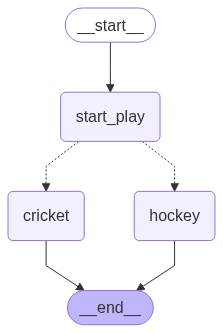

In [7]:
## complie the graph

graph_builder = graph.compile()


## view
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [10]:
graph_builder.invoke({"graph_info":"My name is bharath"})

Start play node has been called
hockey node has been called


{'graph_info': "My name is bharathI'm planning to playHockey"}